In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.stats import linregress

# 3 (b)

In [21]:
# Define constants and parameters
m = 512
L = 2 * np.pi
h = L / m
c = 1
dt = h / (3 * c)
T = 3 * np.pi / np.sqrt(5)
num_steps = int(T / dt)

# Initialize the domain and initial condition
x = np.linspace(0, L, m, endpoint=False)
q_initial = np.exp(np.sin(x) + 0.5 * np.sin(4 * x))

# Initialize the solution array
Q = np.zeros((num_steps, m))

# Set the initial condition
Q[0, :] = q_initial

# Define the function A(x)
def A(x):
    return 2 + (4 / 3) * np.sin(x)

# Main time-stepping loop
for n in range(1, num_steps):
    Ai_minus_half = A(np.arange(0, m) * h)
    Ai = A(np.arange(0.5, m + 0.5) * h)

    F_left = 0.5 * (Ai_minus_half * np.roll(Q[n - 1, :], 1) + Ai * Q[n - 1, :]) - 0.5 * dt / h * (
            Ai - Ai_minus_half) * (Ai * Q[n - 1, :] - Ai_minus_half * np.roll(Q[n - 1, :], 1))

    F_right = 0.5 * (Ai_minus_half * Q[n - 1, :] + Ai * np.roll(Q[n - 1, :], -1)) - 0.5 * dt / h * (
            Ai - Ai_minus_half) * (Ai * np.roll(Q[n - 1, :], -1) - Ai_minus_half * Q[n - 1, :])

    Q[n, :] = Q[n - 1, :] - dt / h * (F_right - F_left)

    # Normalize the solution at each time step to prevent overflow
    Q[n, :] /= np.max(np.abs(Q[n, :]))

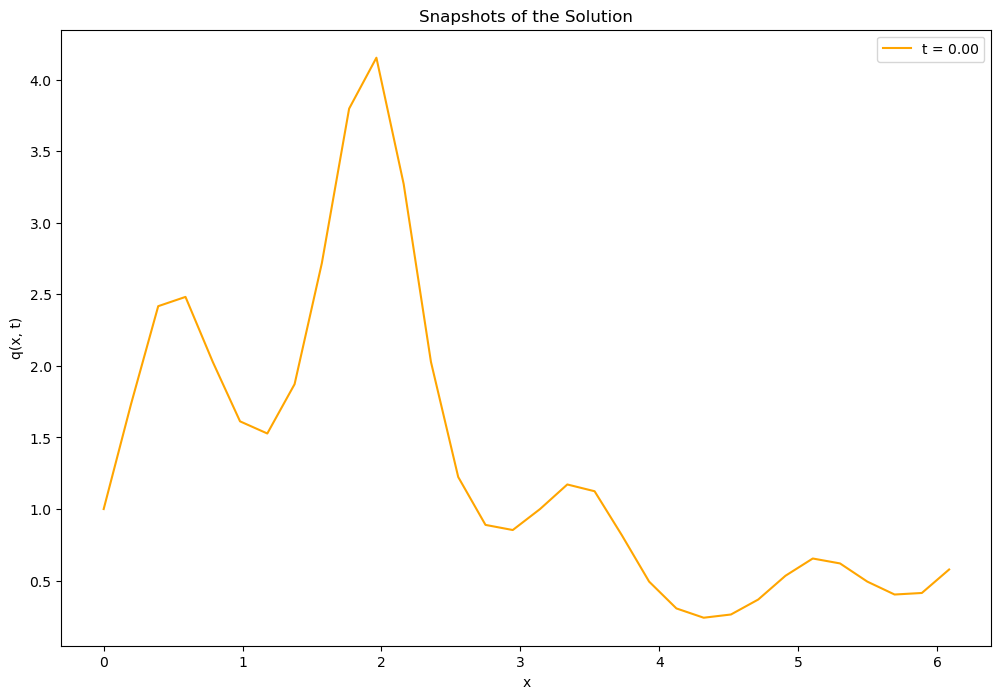

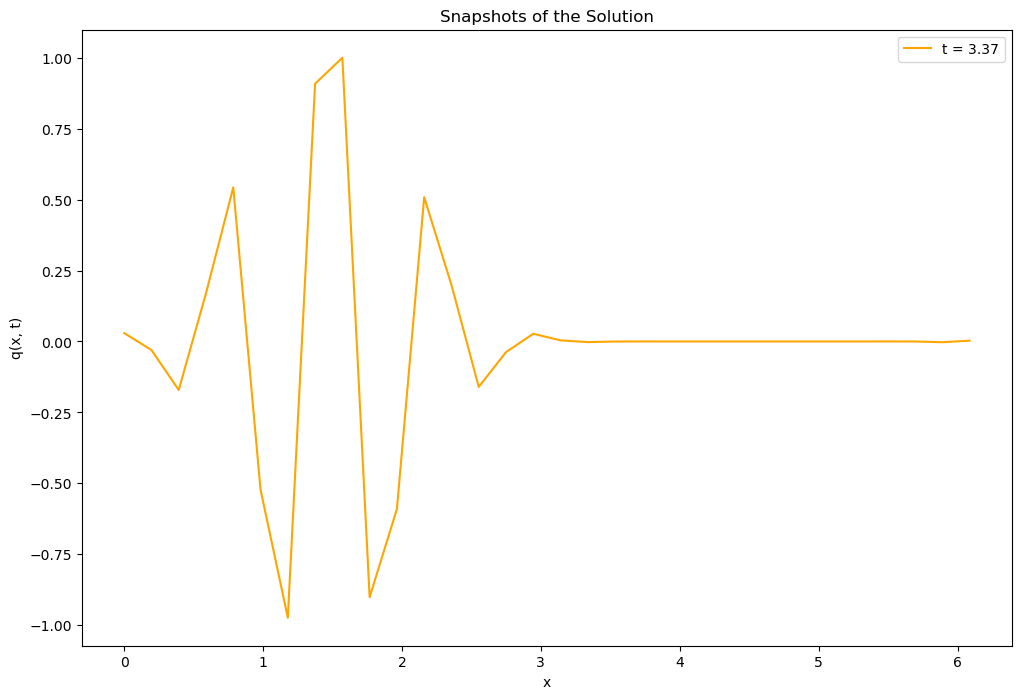

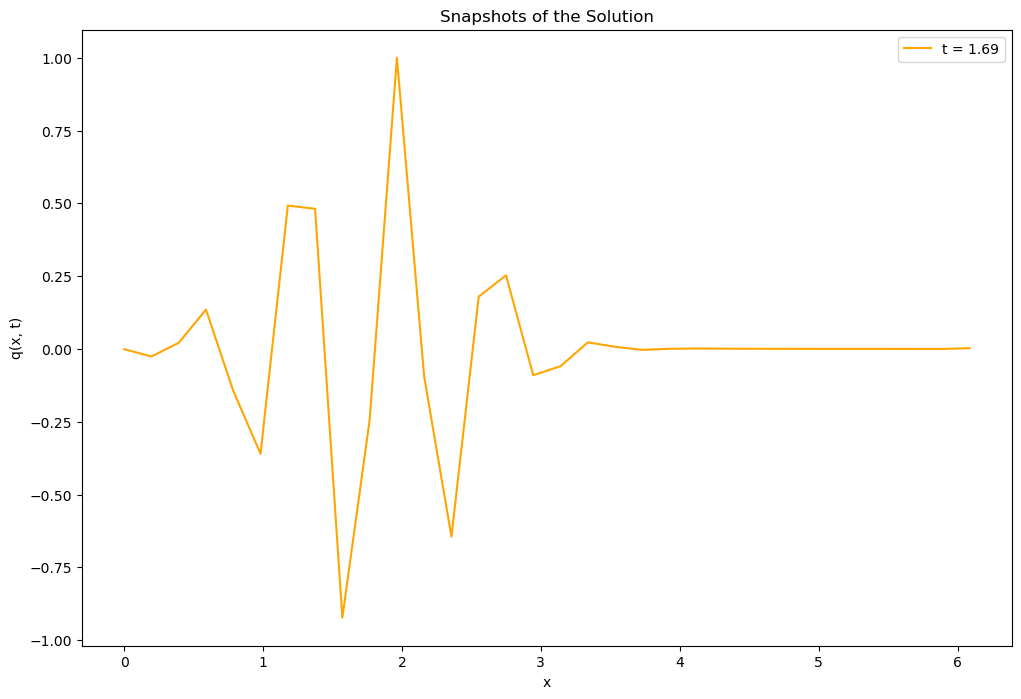

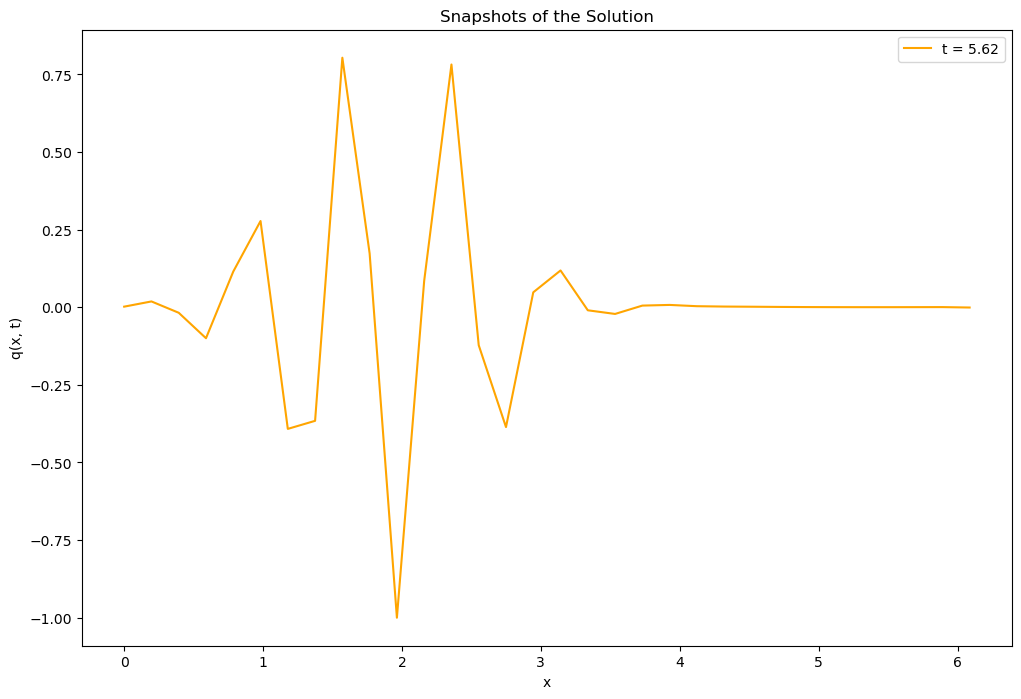

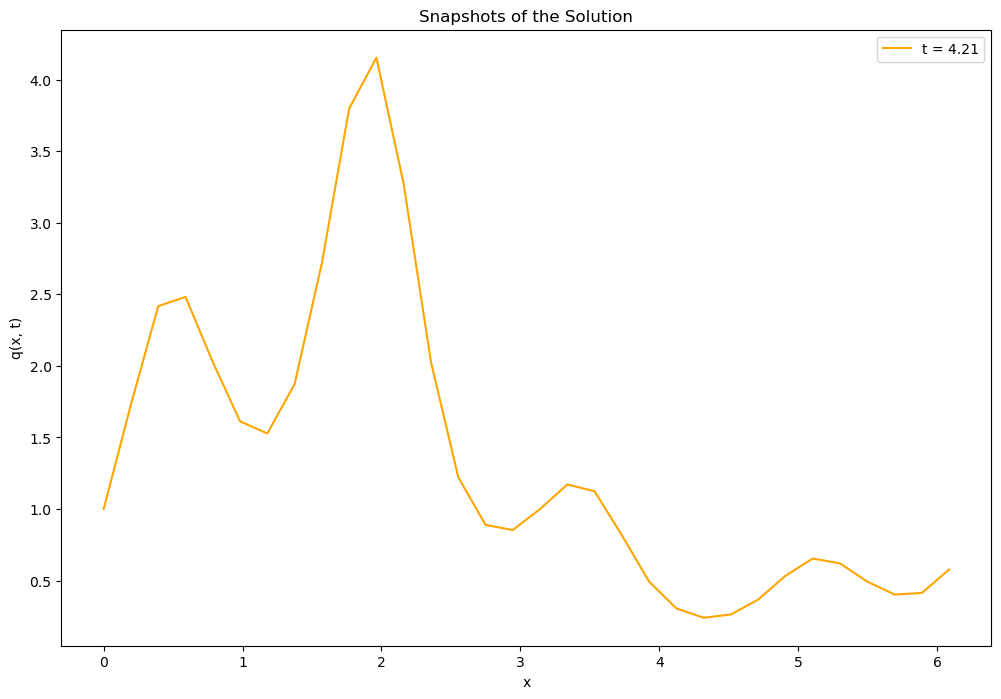

In [20]:
time_snapshots = [0, (4/5)*T, (2/5)*T, (4/3)*T, T]
for t in time_snapshots:
    plt.figure(figsize=(12, 8))
    plt.title('Snapshots of the Solution')
    plt.xlabel('x')
    plt.ylabel('q(x, t)')
    step = int(t / dt)
#     plt.ylim(0,1)
    plt.plot(x, Q[step % num_steps, :], label=f't = {t:.2f}',color='orange')  # Use modulo to stay within array bounds
    plt.legend()
    plt.show()

# 3 (c)

In [22]:
# Define the functions for the initial condition and exact solution
def initial_condition(x):
    return np.exp(np.sin(x) + 0.5 * np.sin(4 * x))

def exact_solution(x, t, T):
    return np.exp(np.sin(x + c * t) + 0.5 * np.sin(4 * (x + c * t)))

# Function to calculate L2 norm
def calculate_l2_norm(numerical, exact, h):
    squared_difference = (numerical - exact)**2
    l2_norm = np.sqrt(simps(squared_difference, dx=h))
    return l2_norm

# Function to perform the time-stepping and calculate L2 norm
def calculate_l2_norm_for_m(m_values, A):
    l2_norms = []

    for m in m_values:
        h = L / m
        x = np.linspace(0, L, m, endpoint=False)

        Q = np.zeros(m)
        Q_initial = initial_condition(x)

        dt = h / (3 * c)  # Adjust the calculation of dt based on the given formula
        num_steps = int(T / dt)  # Define num_steps after dt is calculated

        # Time-stepping loop
        for n in range(num_steps):
            Ai_minus_half = A(np.arange(0, m) * h)
            Ai = A(np.arange(0.5, m + 0.5) * h)

            F_left = 0.5 * (Ai_minus_half * np.roll(Q, 1) + Ai * Q) - 0.5 * dt / h * (
                    Ai - Ai_minus_half) * (Ai * Q - Ai_minus_half * np.roll(Q, 1))

            F_right = 0.5 * (Ai_minus_half * Q + Ai * np.roll(Q, -1)) - 0.5 * dt / h * (
                    Ai - Ai_minus_half) * (Ai * np.roll(Q, -1) - Ai_minus_half * Q)

            Q = Q - dt / h * (F_right - F_left)

            # Normalize the solution at each time step to prevent overflow
            max_abs_value = np.max(np.abs(Q))
            if max_abs_value != 0:
                Q /= max_abs_value

        # Calculate the exact solution at t = T
        exact = exact_solution(x, T, T)

        # Calculate the L2 norm
        l2_norm = calculate_l2_norm(Q, exact, h)
        l2_norms.append(l2_norm)

    return l2_norms

In [24]:
c = 1
L = 2 * np.pi
T = 3 * np.pi / np.sqrt(5)

# Set up values of m
m_values = [256, 512, 1024, 2048]

# Define the function A(x)
def A(x):
    return 2 + (4 / 3) * np.sin(x)

# Initialize arrays to store results
l2_norms = calculate_l2_norm_for_m(m_values, A)[::-1]

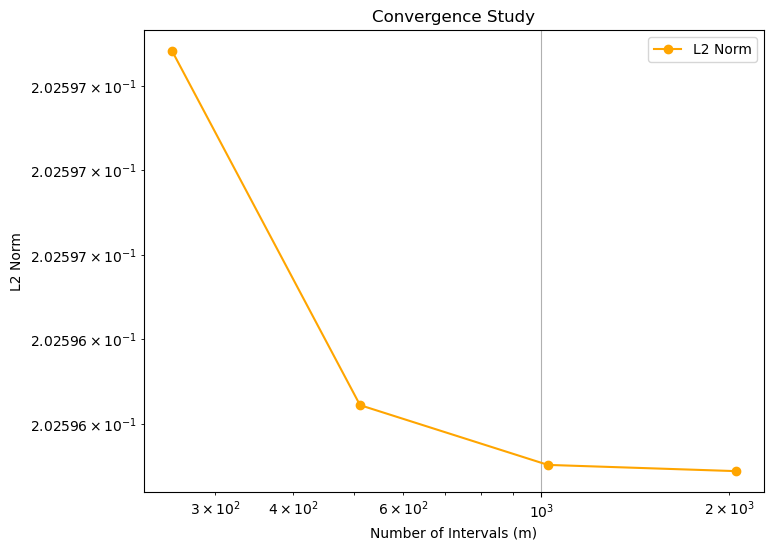

Order of Convergence: 1.81


In [34]:
plt.figure(figsize=(8, 6))
plt.loglog(m_values, l2_norms, marker='o', linestyle='-', label='L2 Norm', color='orange')
plt.xlabel('Number of Intervals (m)')
plt.ylabel('L2 Norm')
plt.title('Convergence Study')
plt.grid(True)
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(np.log(m_values), np.log(l2_norms))
order_of_convergence = str(-slope)  # The order of convergence is the negative of the slope
print(f"Order of Convergence: {order_of_convergence[:6]}")


# 3 (d) for (b)

In [32]:
m = 512
L = 2 * np.pi
h = L / m
c = 3.33
dt = h / (3 * c)
T = 3 * np.pi / np.sqrt(5)
num_steps = int(T / dt)

# Initialize the domain and initial condition
x = np.linspace(0, L, m, endpoint=False)
q_initial = np.maximum(np.pi / 2 - np.abs(x - np.pi), 0)

# Initialize the solution array
Q = np.zeros((num_steps, m))

# Set the initial condition
Q[0, :] = q_initial

# Define the function A(x)
def A(x):
    return 2 + (4 / 3) * np.sin(x)

# Main time-stepping loop
for n in range(1, num_steps):
    Ai_minus_half = A(np.arange(0, m) * h)
    Ai = A(np.arange(0.5, m + 0.5) * h)

    F_left = 0.5 * (Ai_minus_half * np.roll(Q[n - 1, :], 1) + Ai * Q[n - 1, :]) - 0.5 * dt / h * (
            Ai - Ai_minus_half) * (Ai * Q[n - 1, :] - Ai_minus_half * np.roll(Q[n - 1, :], 1))

    F_right = 0.5 * (Ai_minus_half * Q[n - 1, :] + Ai * np.roll(Q[n - 1, :], -1)) - 0.5 * dt / h * (
            Ai - Ai_minus_half) * (Ai * np.roll(Q[n - 1, :], -1) - Ai_minus_half * Q[n - 1, :])

    Q[n, :] = Q[n - 1, :] - dt / h * (F_right - F_left)

    # Normalize the solution at each time step to prevent overflow
    Q[n, :] /= np.max(np.abs(Q[n, :]))

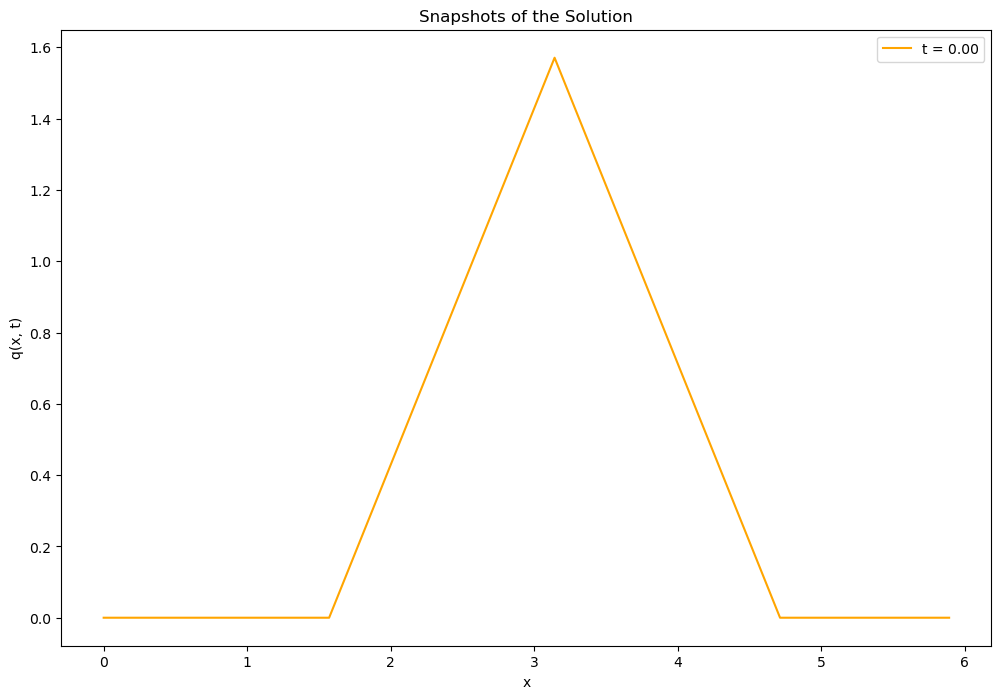

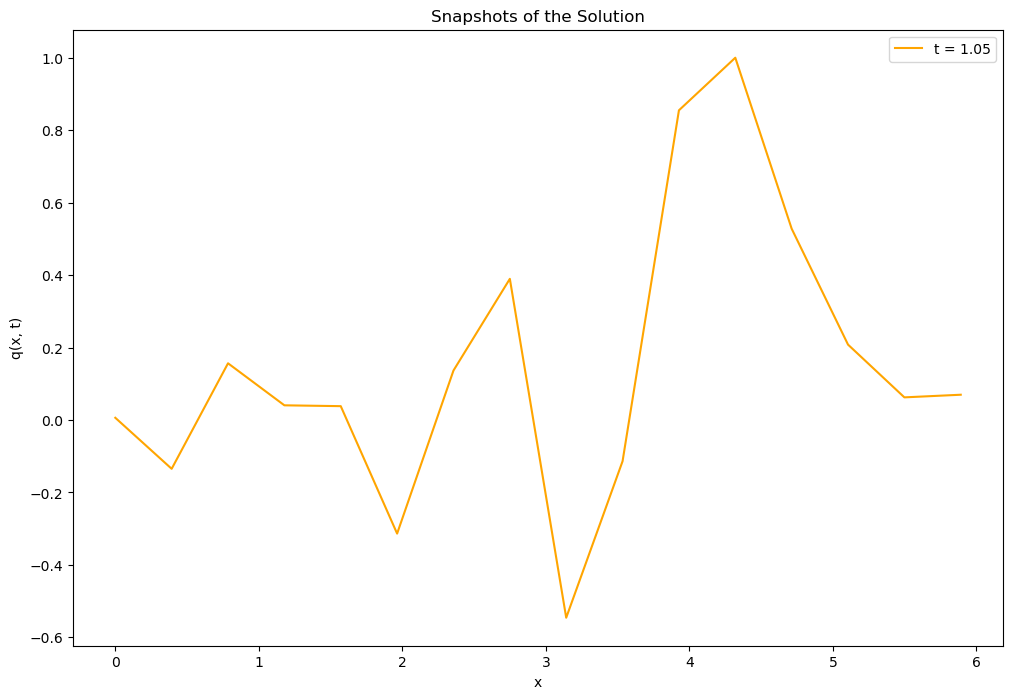

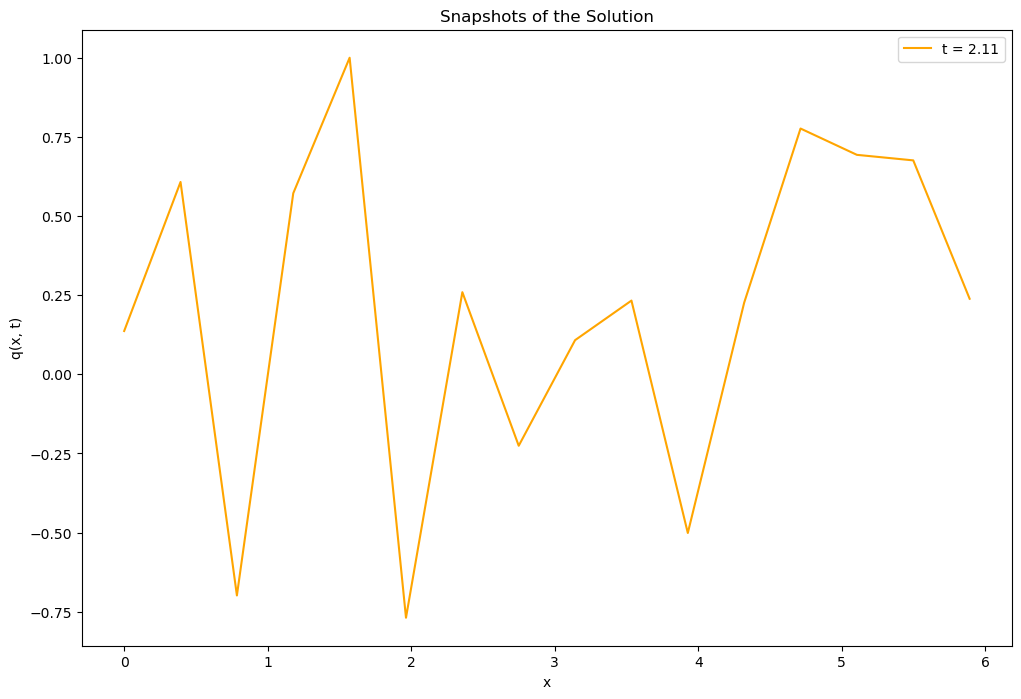

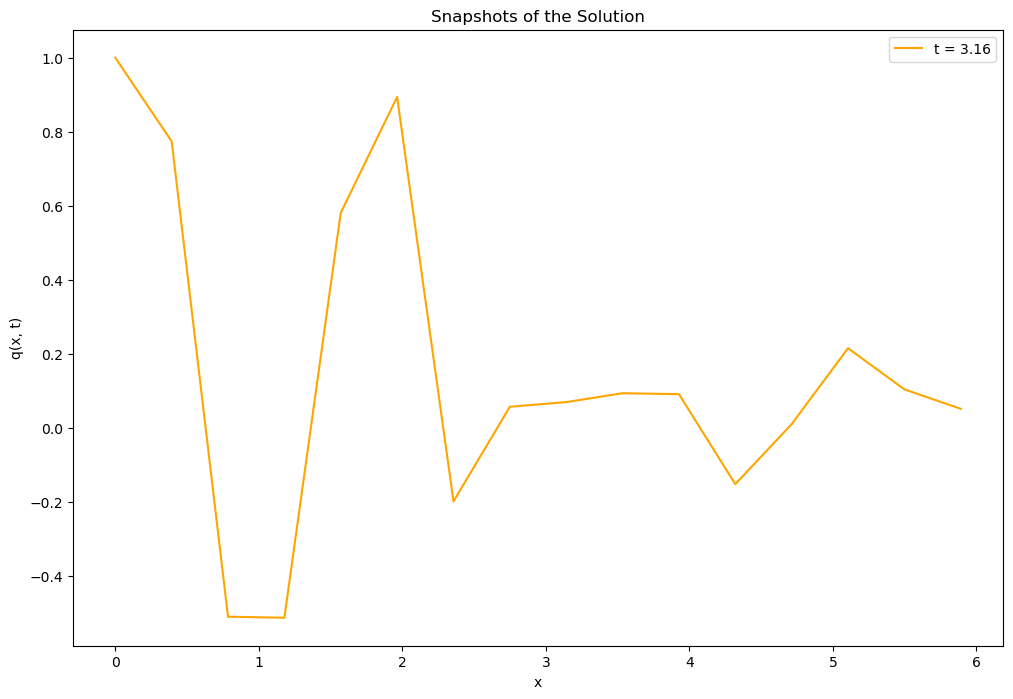

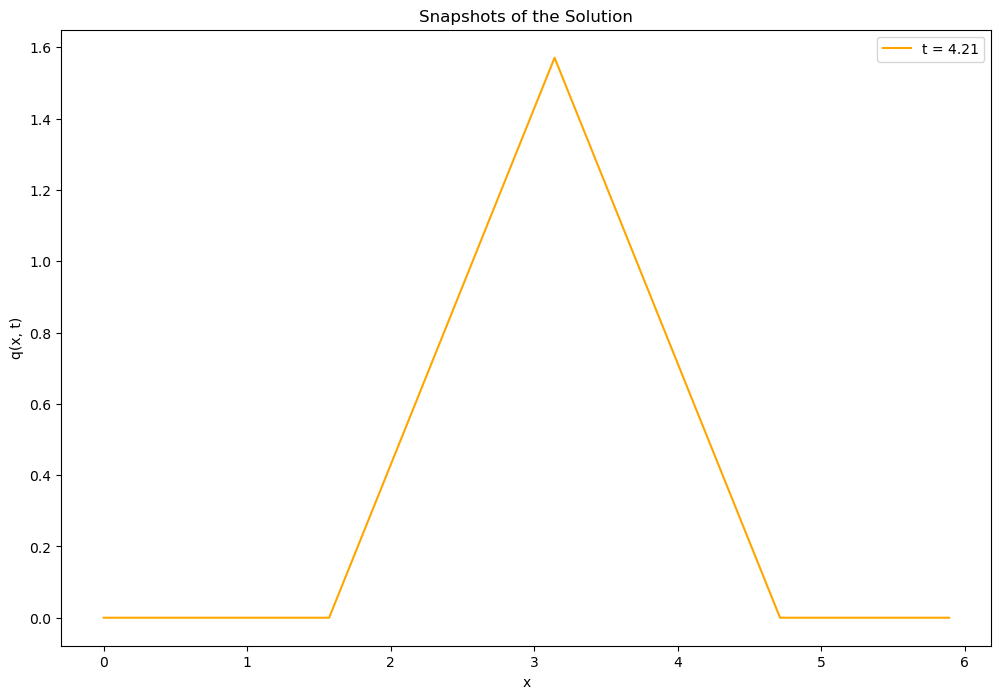

In [33]:
# Plot snapshots of the solution

time_snapshots = [0, T / 4, T / 2, 3 * T / 4, T]
for t in time_snapshots:
    plt.figure(figsize=(12, 8))
    plt.title('Snapshots of the Solution')
    plt.xlabel('x')
    plt.ylabel('q(x, t)')
    step = int(t / dt)
    plt.plot(x, Q[step % num_steps, :], label=f't = {t:.2f}', color='orange')  # Use modulo to stay within array bounds
    plt.legend()
    plt.show()

# 3 (d) for (c)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
import math

# Define the functions for the initial condition and exact solution
def initial_condition(x):
     return np.maximum(np.pi / 2 - np.abs(x - np.pi), 0)

def exact_solution(x, t, T):
    return np.maximum(np.pi / 2 - np.abs((x + c * t) - np.pi), 0)

# Function to calculate L2 norm
def calculate_l2_norm(numerical, exact, h):
    squared_difference = (numerical - exact)**2
    l2_norm = np.sqrt(simps(squared_difference, dx=h))
    return l2_norm

# Function to perform the time-stepping and calculate L2 norm
def calculate_l2_norm_for_m(m_values, A):
    l2_norms = []

    for m in m_values:
        h = L / m
        x = np.linspace(0, L, m, endpoint=False)

        Q = np.zeros(m)
        Q_initial = initial_condition(x)

        dt = h / (3 * c)  # Adjust the calculation of dt based on the given formula
        num_steps = int(T / dt)  # Define num_steps after dt is calculated

        # Time-stepping loop
        for n in range(num_steps):
            Ai_minus_half = A(np.arange(0, m) * h)
            Ai = A(np.arange(0.5, m + 0.5) * h)

            F_left = 0.5 * (Ai_minus_half * np.roll(Q, 1) + Ai * Q) - 0.5 * dt / h * (
                    Ai - Ai_minus_half) * (Ai * Q - Ai_minus_half * np.roll(Q, 1))

            F_right = 0.5 * (Ai_minus_half * Q + Ai * np.roll(Q, -1)) - 0.5 * dt / h * (
                    Ai - Ai_minus_half) * (Ai * np.roll(Q, -1) - Ai_minus_half * Q)

            Q = Q - dt / h * (F_right - F_left)

            # Normalize the solution at each time step to prevent overflow
            max_abs_value = np.max(np.abs(Q))
            if max_abs_value != 0:
                Q /= max_abs_value

        # Calculate the exact solution at t = T
        exact = exact_solution(x, T, T)

        # Calculate the L2 norm
        l2_norm = calculate_l2_norm(Q, exact, h)
        l2_norms.append(l2_norm)

    return l2_norms
# Set up parameters
c =1
L = 2 * np.pi
T = 3 * np.pi / np.sqrt(5)

# Set up values of m
m_values = [256, 512, 1024, 2048]

# Define the function A(x)
def A(x):
    return 2 + (4 / 3) * np.sin(x)

# Initialize arrays to store results
l2_norms = calculate_l2_norm_for_m(m_values, A)

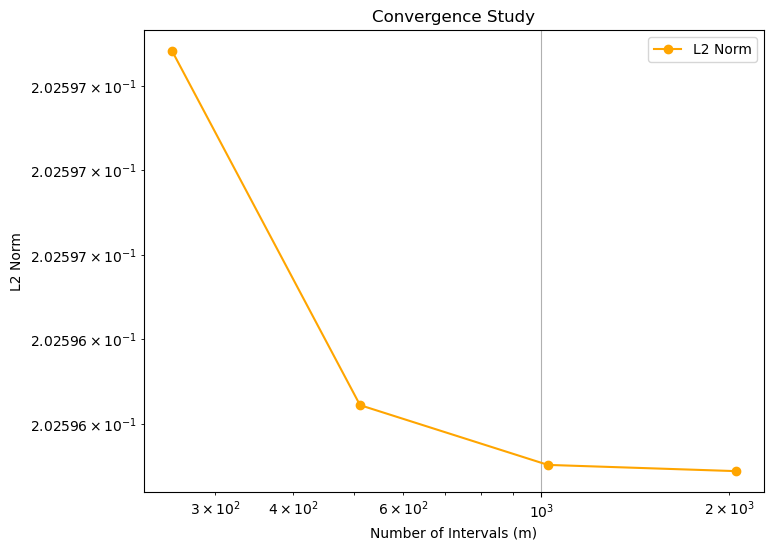

Order of Convergence: 1


In [29]:

# Plot results
plt.figure(figsize=(8, 6))
plt.loglog(m_values, l2_norms, marker='o', linestyle='-', color='orange', label='L2 Norm')
plt.xlabel('Number of Intervals (m)')
plt.ylabel('L2 Norm')
plt.title('Convergence Study')
plt.grid(True)
plt.legend()
plt.show()

# Perform linear regression to determine the order of convergence
slope, intercept, r_value, p_value, std_err = linregress(np.log(m_values), np.log(l2_norms))
order_of_convergence = -slope  # The order of convergence is the negative of the slope
print(f"Order of Convergence: {math.ceil(order_of_convergence)}")